# This notebook trains a logistic regression model from the 2018 racing results to predict the GC top 10 in 2017 Tour de France

This is to test if the limited number of features we got from 2018 are of any good.

In [77]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [134]:
df_X_train = pd.read_csv('E:\cycling\cycling\data\X_train.csv',index_col='Rider',encoding='iso-8859-1')
df_y_train = pd.read_csv('E:\cycling\cycling\data\y_train.csv',index_col='Rider',encoding='iso-8859-1')

df_X_test = pd.read_csv('E:\cycling\cycling\data\X_test.csv',index_col='Rider',encoding='iso-8859-1')
df_y_test = pd.read_csv('E:\cycling\cycling\data\y_test.csv',index_col='Rider',encoding='iso-8859-1')

In [135]:
X_train = np.asarray(df_X_train)
y_train = np.asarray(df_y_train)

X_test = np.asarray(df_X_test)
y_test = np.asarray(df_y_test)

In [117]:
kMax = 10
cost=[]
for k in range(1,kMax+1):
    # run k-means clustering
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X_train)

    cost.append(kmeans.inertia_)

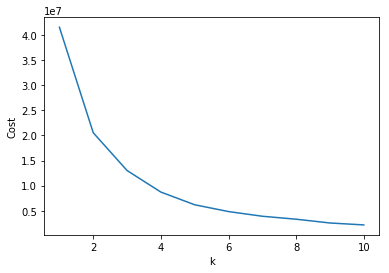

In [118]:
plt.plot(range(1, kMax+1),cost)
plt.xlabel('k')
plt.ylabel('Cost')
plt.show()

In [120]:
k = 5
kmeans = KMeans(n_clusters=k, random_state=0).fit(X_train)

# add clustering labels
df_X_train.insert(0, 'Cluster Labels', kmeans.labels_)

In [121]:
df_X_train

,Cluster Labels,rank_start,point_start,win,podium,top_ten,points,race_days,win_dauphine,podium_dauphine,top_ten_dauphine,points_dauphine
Rider,,,,,,,,,,,,
BARDET Romain,3,30.0,1162.0,1,6,17,772,32,0.0,2.0,6.0,203.0
DILLIER Silvan,0,72.0,653.0,1,3,6,371,38,0.0,0.0,0.0,5.0
FRANK Mathias,2,156.0,375.0,0,0,8,262,52,0.0,0.0,1.0,30.0
LATOUR Pierre,0,124.0,453.0,1,3,18,601,43,0.0,0.0,5.0,106.0
NAESEN Oliver,3,37.0,1019.0,0,2,7,433,41,0.0,0.0,2.0,15.0
CORT NIELSEN Magnus,0,112.0,480.0,2,6,17,424,47,0.0,0.0,2.0,13.0
FRAILE MATARRANZ Omar,2,257.0,263.0,2,4,4,225,37,0.0,0.0,0.0,5.0
FUGLSANG Jakob,0,67.0,703.0,1,7,16,786,39,0.0,2.0,3.0,224.0
HANSEN Jesper,2,233.0,279.0,0,0,1,145,38,0.0,0.0,0.0,12.0


In [123]:
df_X.groupby('Cluster Labels').count()

,rank_start,point_start,win,podium,top_ten,points,race_days,win_dauphine,podium_dauphine,top_ten_dauphine,points_dauphine
Cluster Labels,,,,,,,,,,,
0,24,24,24,24,24,24,24,24,24,24,24
1,10,10,10,10,10,10,10,10,10,10,10
2,39,39,39,39,39,39,39,39,39,39,39
3,14,14,14,14,14,14,14,14,14,14,14
4,3,3,3,3,3,3,3,3,3,3,3


In [124]:
df_X.loc[df_X['Cluster Labels'] == 0, :]

,Cluster Labels,rank_start,point_start,win,podium,top_ten,points,race_days,win_dauphine,podium_dauphine,top_ten_dauphine,points_dauphine
Rider,,,,,,,,,,,,
DILLIER Silvan,0,72.0,653.0,1,3,6,371,38,0.0,0.0,0.0,5.0
LATOUR Pierre,0,124.0,453.0,1,3,18,601,43,0.0,0.0,5.0,106.0
CORT NIELSEN Magnus,0,112.0,480.0,2,6,17,424,47,0.0,0.0,2.0,13.0
FUGLSANG Jakob,0,67.0,703.0,1,7,16,786,39,0.0,2.0,3.0,224.0
VALGREN ANDERSEN Michael,0,111.0,483.0,2,2,3,627,38,0.0,0.0,0.0,14.0
IZAGIRRE INSAUSTI Gorka,0,100.0,530.0,1,7,20,691,51,0.0,1.0,1.0,23.0
IZAGIRRE INSAUSTI Ion,0,46.0,904.0,0,5,12,576,51,0.0,0.0,1.0,38.0
CARUSO Damiano,0,63.0,747.0,1,5,13,414,42,0.0,1.0,5.0,133.0
KÜNG Stefan,0,69.0,660.0,4,7,11,269,40,2.0,2.0,2.0,105.0


In [125]:
df_X.loc[df_X['Cluster Labels'] == 1, :]

,Cluster Labels,rank_start,point_start,win,podium,top_ten,points,race_days,win_dauphine,podium_dauphine,top_ten_dauphine,points_dauphine
Rider,,,,,,,,,,,,
KANGERT Tanel,1,926.0,58.0,1,1,1,123,44,0.0,0.0,0.0,60.0
HAUSSLER Heinrich,1,899.0,60.0,0,0,0,78,24,0.0,0.0,0.0,5.0
KOREN Kristjan,1,933.0,57.0,1,1,5,66,40,0.0,0.0,1.0,5.0
GUARNIERI Jacopo,1,1950.0,10.0,0,0,0,20,25,0.0,0.0,0.0,5.0
THOMSON Jay Robert,1,891.0,61.0,0,0,1,35,39,0.0,0.0,0.0,5.0
CRADDOCK Lawson,1,1733.0,15.0,0,1,4,104,44,0.0,0.0,0.0,5.0
PHINNEY Taylor,1,1206.0,36.0,0,0,2,117,34,0.0,0.0,0.0,5.0
KOCHETKOV Pavel,1,1121.0,42.0,0,0,1,65,42,0.0,0.0,0.0,5.0
BERNARD Julien,1,737.0,87.0,0,1,4,73,40,0.0,0.0,0.0,10.0


In [126]:
df_X.loc[df_X['Cluster Labels'] == 2, :]

,Cluster Labels,rank_start,point_start,win,podium,top_ten,points,race_days,win_dauphine,podium_dauphine,top_ten_dauphine,points_dauphine
Rider,,,,,,,,,,,,
FRANK Mathias,2,156.0,375.0,0,0,8,262,52,0.0,0.0,1.0,30.0
FRAILE MATARRANZ Omar,2,257.0,263.0,2,4,4,225,37,0.0,0.0,0.0,5.0
HANSEN Jesper,2,233.0,279.0,0,0,1,145,38,0.0,0.0,0.0,12.0
PELLIZOTTI Franco,2,432.0,166.0,0,0,0,25,31,0.0,0.0,0.0,5.0
GERRANS Simon,2,148.0,395.0,0,1,5,109,40,0.0,0.0,0.0,5.0
SCHÄR Michael,2,608.0,114.0,0,1,1,81,38,0.0,0.0,0.0,5.0
BODNAR Maciej,2,271.0,249.0,1,2,10,118,46,0.0,0.0,2.0,17.0
BURGHARDT Marcus,2,274.0,248.0,0,0,6,125,30,0.0,0.0,1.0,7.0
MÜHLBERGER Gregor,2,219.0,297.0,0,1,9,167,33,0.0,0.0,2.0,20.0


In [127]:
df_X.loc[df_X['Cluster Labels'] == 3, :]

,Cluster Labels,rank_start,point_start,win,podium,top_ten,points,race_days,win_dauphine,podium_dauphine,top_ten_dauphine,points_dauphine
Rider,,,,,,,,,,,,
BARDET Romain,3,30.0,1162.0,1,6,17,772,32,0.0,2.0,6.0,203.0
NAESEN Oliver,3,37.0,1019.0,0,2,7,433,41,0.0,0.0,2.0,15.0
COLBRELLI Sonny,3,33.0,1120.0,3,8,20,572,44,1.0,1.0,3.0,56.0
DEMARE Arnaud,3,13.0,1472.0,2,6,10,584,31,1.0,1.0,2.0,50.0
LANDA MEANA Mikel,3,19.0,1336.0,1,4,13,500,33,0.0,0.0,2.0,34.0
QUINTANA ROJAS Nairo Alexander,3,9.0,1560.0,1,7,14,606,31,1.0,2.0,4.0,209.0
ALAPHILIPPE Julian,3,39.0,1011.0,5,10,20,932,45,1.0,2.0,3.0,92.0
BOASSON HAGEN Edvald,3,28.0,1205.0,2,6,12,545,40,0.0,1.0,1.0,33.0
ZAKARIN Ilnur,3,23.0,1272.0,0,0,4,190,34,0.0,0.0,3.0,73.0


In [128]:
df_X.loc[df_X['Cluster Labels'] == 4, :]

,Cluster Labels,rank_start,point_start,win,podium,top_ten,points,race_days,win_dauphine,podium_dauphine,top_ten_dauphine,points_dauphine
Rider,,,,,,,,,,,,
VAN AVERMAET Greg,4,2.0,2381.0,5,10,21,785,47,1.0,1.0,2.0,19.0
SAGAN Peter,4,3.0,2296.0,6,14,26,1246,43,1.0,2.0,5.0,90.0
KRISTOFF Alexander,4,5.0,1969.0,4,5,23,685,54,0.0,1.0,2.0,23.0


In [129]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [130]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [137]:
X_train = preprocessing.StandardScaler().fit(X_train).transform(X_train)
X_test = preprocessing.StandardScaler().fit(X_test).transform(X_test)

In [168]:
clf = LogisticRegression(C=1, solver='liblinear').fit(X_test,y_test)
pred = clf.predict(X_train)
cnf_matrix = confusion_matrix(y_train, pred, labels=[1,0])

Confusion matrix, without normalization
[[ 2  5]
 [ 1 82]]


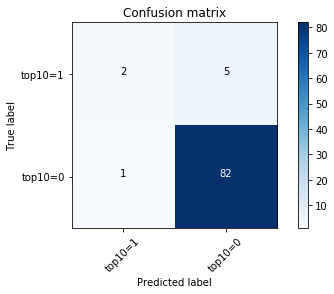

In [169]:
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['top10=1','top10=0'],normalize= False,  title='Confusion matrix')

In [162]:
df_X_train.insert(0, 'top10',pred)

ValueError: cannot insert top10, already exists

In [170]:
df_X_train[df_X_train['top10']==1]

,top10,rank_start,point_start,win,podium,top_ten,points,race_days,win_dauphine,podium_dauphine,top_ten_dauphine,points_dauphine
Rider,,,,,,,,,,,,
BARDET Romain,1,30.0,1162.0,1,6,17,772,32,0.0,2.0,6.0,203.0
FUGLSANG Jakob,1,67.0,703.0,1,7,16,786,39,0.0,2.0,3.0,224.0
YATES Adam,1,53.0,847.0,2,9,18,671,33,1.0,3.0,6.0,268.0
QUINTANA ROJAS Nairo Alexander,1,9.0,1560.0,1,7,14,606,31,1.0,2.0,4.0,209.0
THOMAS Geraint,1,55.0,810.0,4,11,15,804,36,2.0,5.0,6.0,372.0


In [157]:
df_y_test[df_y_test['tdf_top10']==1]

,tdf_top10
Rider,
BARDET Romain,1
ARU Fabio,1
YATES Simon,1
MARTIN Daniel,1
FROOME Chris,1
BARGUIL Warren,1
CONTADOR VELASCO Alberto,1
MEINTJES Louis,1


In [150]:
df_y_train[df_y_train['tdf_top10']==1]

,tdf_top10
Rider,
BARDET Romain,1
LANDA MEANA Mikel,1
QUINTANA ROJAS Nairo Alexander,1
ZAKARIN Ilnur,1
KRUIJSWIJK Steven,1
THOMAS Geraint,1
MARTIN Daniel,1
